In [2]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [3]:
# Подавление предупреждений
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Переменная для инициализации генератора случайных чисел
random_seed_number = 9

### Содержание

0. **Описание задачи.**
1. **Прочение данных.**
2. **Визуализация и интепретация данных и вычисление основных хар-к (среднее, разброс, корреляционную матрицу и т.д.).**
3. **Обработка пропущенных значений.**
4. **Обработка категориальных признаков.**
5. **Проведение нормализации (или объяснить, почему в вашем случае она не нужна).**
6. **Разбиение данных на обучающую и тестовую выборки.**
7. **Запустить классификатор.**
8. **Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы.**
9. По желанию: запустить другие классификаторы. Сравнить результаты.
10. По желанию: как-то побороться с несбалансированностью классов (если она есть).
11. По желанию: исключить коррелированные переменные (объяснить зачем).
12. Сделать общие выводы.

# Оценка стоимости дома в Германии

## 0.Описание задачи

Определение цены недвижимости в Германии (в частности домов) с целью купли-продажи или определения текущей стоимости дома.

1. Задача *классификации* - определение к какому типу относится дом по признакам.
 

## 1. Получение данных

In [5]:
#url = "https://github.com/LiliaTimurkaeva/Machine_learning/blob/main/germany_housing_data_14.07.2020.csv"
url = "germany_housing_data_14.07.2020.csv"
dataset_1 = pd.read_csv(url, dtype={3: "float32", 24: "float32"})

Таблица содержит данные о ценах 10552 домов в Германии. 
Известно, что в датасете представлены 25 признаков (в датасете 26 столбцов, первый столбец является нумерацией, поэтому его не стоит учитывать) и данные можно разделить на 16 классов в соответсвии с 16 земель-государств, обладающих частичным суверенитетом и объединённых в федерацию (https://ru.wikipedia.org/wiki/%D0%97%D0%B5%D0%BC%D0%BB%D0%B8_%D0%93%D0%B5%D1%80%D0%BC%D0%B0%D0%BD%D0%B8%D0%B8).

Также данные можно разделить на следующие типы домов (всего 11 типов):
- Multiple dwelling - Многоквартирное жилье
- Mid-terrace house - Дом со средней террасой
- Farmhouse - Фермерский дом
- Duplex - Дом на две семьи, разделенный пополам
- Single dwelling - Односемейный дом
- Residential property - Жилая недвижимость
- Special property – Специфический дом
- Bungalow – Бунгало, одноэтажный дом для одной семьи, часто с плоской крышей и обширной верандой
- Villa – Вилла, загородный дом предназначенный для сезонного проживания, дорогостоящий, богато украшенный, на большой территории, для проживания одной семьи
- Corner house – угловой дом
- Castle - Замок

Данные имеют пропущеные значения и классы несбалансированы.

Размеры таблицы - количество строк (каждая строка соответствует одному дому) и количество столбцов (каждый столбец соответствует конкретному признаку, кроме первого столбца):

In [6]:
dataset_1.shape

(10552, 26)

Отсюда видно, что в датасете есть 26 столбцов и 10552 объектов. Метод data_raw.head() отображает первые строки (по умолчанию, 5 строк) таблицы

In [7]:
dataset_1.head()

,Unnamed: 0,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
0,0,498000.0,Multiple dwelling,106.000000,229.0,NaN,01.10.2020,5.5,3.0,1.0,...,Gas,available,demand certificate,NaN,D,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,1,495000.0,Mid-terrace house,140.929993,517.0,20.00,01.01.2021,6.0,3.0,2.0,...,NaN,not required by law,NaN,NaN,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,2,749000.0,Farmhouse,162.889999,82.0,37.62,01.07.2020,5.0,3.0,2.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,3,259000.0,Farmhouse,140.000000,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,...,Strom,available,demand certificate,NaN,G,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,4,469000.0,Multiple dwelling,115.000000,244.0,NaN,sofort,4.5,2.0,1.0,...,Öl,available,demand certificate,NaN,F,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage


Видно, что первый столбец 'Unnamed: 0' является нумерацией, поэтому мы можем его удалить. По отобразившимся столбцам, видим что количество признаков 25

In [8]:
dataset = dataset_1.drop(['Unnamed: 0'], axis=1)

Последние строки:

In [9]:
dataset.tail()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
10547,1495000.0,Special property,167.000000,683.0,63.0,nach Vereinbarung,6.5,4.0,3.0,NaN,...,Fernwärme,available,consumption certificate,113.2,D,Bayern,München,Perlach,1.0,Garage
10548,449000.0,Mid-terrace house,222.000000,4000.0,NaN,NaN,6.0,5.0,3.0,1.0,...,Erdwärme,available,demand certificate,NaN,A+,Sachsen-Anhalt,Altmarkkreis Salzwedel,Henningen,4.0,Parking lot
10549,678000.0,Mid-terrace house,142.000000,377.0,NaN,31.07.2021,4.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayern,Augsburg (Kreis),Untermeitingen,2.0,Garage
10550,419900.0,Mid-terrace house,120.830002,501.0,NaN,sofort,5.0,NaN,1.0,2.0,...,NaN,available,demand certificate,NaN,A+,Sachsen-Anhalt,Börde (Kreis),Wolmirstedt,1.0,Garage
10551,699000.0,Multiple dwelling,145.000000,357.0,NaN,NaN,5.5,4.0,1.0,3.0,...,"Solar, Gas",available,demand certificate,NaN,A,Bayern,Augsburg (Kreis),Diedorf,2.0,Garage


Мы видим, что столбцы (признаки) имеют следующие имена:

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 25 columns):
Price                      10552 non-null float64
Type                       10150 non-null object
Living_space               10552 non-null float32
Lot                        10552 non-null float64
Usable_area                5568 non-null float64
Free_of_Relation           6983 non-null object
Rooms                      10552 non-null float64
Bedrooms                   6878 non-null float64
Bathrooms                  8751 non-null float64
Floors                     7888 non-null float64
Year_built                 9858 non-null float64
Furnishing_quality         7826 non-null object
Year_renovated             5349 non-null float64
Condition                  10229 non-null object
Heating                    9968 non-null object
Energy_source              9325 non-null object
Energy_certificate         9797 non-null object
Energy_certificate_type    7026 non-null object
Energy_cons

Посмотрим значения признака Type:

In [11]:
dataset['Type'].unique()

array(['Multiple dwelling', 'Mid-terrace house', 'Farmhouse', 'Duplex',
       'Single dwelling', 'Residential property', 'Special property',
       'Bungalow', 'Villa', 'Corner house', nan, 'Castle'], dtype=object)

Посмотрим значения признака State:

In [12]:
dataset['State'].unique()

array(['Baden-Württemberg', 'Rheinland-Pfalz', 'Bayern', 'Hessen',
       'Berlin', nan, 'Brandenburg', 'Bremen', 'Niedersachsen', 'Hamburg',
       'Nordrhein-Westfalen', 'Mecklenburg-Vorpommern',
       'Schleswig-Holstein', 'Saarland', 'Sachsen', 'Sachsen-Anhalt',
       'Thüringen'], dtype=object)

Мы видим, что столбцы (признаки) имеют имена


<code>Столбцы     	| Описание 			|
:---------------------- | :------------------------------:	
Price       			|Цена (евро)          		|        
Type                   	|Тип дома			|
Living_space           	|Жилая площадь, кв.м.		|
Lot                    	|Лот				|
Usable_area            	|Полезная площадь, кв.м.		|
Free_of_Relation       	|Ограничения			|
Rooms                  	|Кол. Комнат			|
Bedrooms               	|Кол. спальных комнат		|
Bathrooms              	|Кол. ванных комнат		|
Floors                 	|Кол. Этажей			|
Year_built             	|Год постройки			|
Furnishing_quality     	|Качество Меблировки		|
Year_renovated         	|Год ремонта			|
Condition              	|Состояние			|
Heating                	|Отопление			|
Energy_source          	|Источник энергии		|
Energy_certificate     	|Энергетический сертификат	|
Energy_certificate_type	|Тип сертификата			|
Energy_consumption     	|Энергопотребление		|
Energy_efficiency_class	| Класс энергоэффективности	|
State                  	|Земля-государство(штат)		|
City                   	|Город				|
Place                  	|Место				|
Garages                	|Кол. гаражей			|
Garagetype             	|Тип гаража			|
</code>

Значения признака Type (Тип дома):
1. Multiple dwelling - Многоквартирное жилье
2. Mid-terrace house - Дом со средней террасой
3. Farmhouse - Фермерский дом
4. Duplex - Дом на две семьи, разделенный пополам
5. Single dwelling - Односемейный дом
6. Residential property - Жилая недвижимость
7. Special property – Специфический дом
8. Bungalow – Бунгало, одноэтажный дом для одной семьи, часто с плоской крышей и обширной верандой
9. Villa – Вилла, загородный дом предназначенный для сезонного проживания, дорогостоящий, богато украшенный, на большой территории, для проживания одной семьи
10. Corner house – угловой дом
11. Castle - Замок

Значения признака State (Земля-государство(штат)):
1. Baden-Württemberg
2. Rheinland-Pfalz
3. Bayern
4. Hessen
5. Berlin
6. Brandenburg
7. Bremen
8. Niedersachsen
9. Hamburg
10. Nordrhein-Westfalen
11. Mecklenburg-Vorpommern
12. Schleswig-Holstein
13. Saarland
14. Sachsen
15. Sachsen-Anhalt
16. Thüringen

Посмотрим на количество уникальных значений в датасете:

In [13]:
dataset.nunique()

Price                      1411
Type                         11
Living_space               1867
Lot                        2526
Usable_area                1012
Free_of_Relation            705
Rooms                        72
Bedrooms                     32
Bathrooms                    28
Floors                       10
Year_built                  292
Furnishing_quality            4
Year_renovated               67
Condition                    10
Heating                      13
Energy_source               104
Energy_certificate            3
Energy_certificate_type       2
Energy_consumption         1423
Energy_efficiency_class       9
State                        16
City                        534
Place                      4762
Garages                      37
Garagetype                    7
dtype: int64

`Номинальные (категориальные) признаки:`
- **Type**
- Free_of_Relation
- Furnishing_quality
- Condition
- Heating
- Energy_source
- Energy_certificate
- Energy_certificate_type
- Energy_efficiency_class
- **State**
- City
- Place
- Garagetype

`Количественные (числовые) признаки:`
- Price
- Living_space
- Lot
- Usable_area
- Rooms
- Bedrooms
- Bathrooms
- Floors
- Year_built
- Year_renovated
- Energy_consumption
- Garages

Имена столбцов (признаков) можно получить таким образом:

In [14]:
dataset.columns

Index(['Price', 'Type', 'Living_space', 'Lot', 'Usable_area',
       'Free_of_Relation', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floors',
       'Year_built', 'Furnishing_quality', 'Year_renovated', 'Condition',
       'Heating', 'Energy_source', 'Energy_certificate',
       'Energy_certificate_type', 'Energy_consumption',
       'Energy_efficiency_class', 'State', 'City', 'Place', 'Garages',
       'Garagetype'],
      dtype='object')

Имена строк (совпадают с номерами)

In [15]:
dataset.index

RangeIndex(start=0, stop=10552, step=1)

Столбцы `Type` и `State` содержат категориальные значения. Пока они имеют тип `Object`. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [16]:
dataset['Type'].dtype

dtype('O')

In [17]:
dataset['Type'] = dataset['Type'].astype('category')

In [18]:
dataset['Type'].dtype

CategoricalDtype(categories=['Bungalow', 'Castle', 'Corner house', 'Duplex', 'Farmhouse',
                  'Mid-terrace house', 'Multiple dwelling',
                  'Residential property', 'Single dwelling',
                  'Special property', 'Villa'],
                 ordered=False)

In [19]:
dataset['State'] = dataset['State'].astype('category')

In [20]:
dataset['State'].dtype

CategoricalDtype(categories=['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg',
                  'Bremen', 'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern',
                  'Niedersachsen', 'Nordrhein-Westfalen', 'Rheinland-Pfalz',
                  'Saarland', 'Sachsen', 'Sachsen-Anhalt',
                  'Schleswig-Holstein', 'Thüringen'],
                 ordered=False)

### Доступ к отдельным элементам и выделение подтаблиц (slice)

  Cпособ доступа    |      Элемент  | Подтаблица
 ------------------ | ------------- | -----------
  Доступ по имени   | `at`, `loc`   | `loc`
  Доступ по номеру  | `iat`, `iloc` | `iloc`


In [21]:
dataset.at[2, 'Type']

'Farmhouse'

In [22]:
dataset.loc[2, 'Type']

'Farmhouse'

In [23]:
dataset.iat[2, 1]

'Farmhouse'

In [24]:
dataset.iloc[2, 1]

'Farmhouse'

### Подтаблицы

`loc` и `iloc` (но не `at` и `iat`) позволяют выделять не только отдельные элементы, но и подтаблицы (slice)

In [25]:
dataset.loc[[2,3,5], ['Type', 'State', 'Rooms']]

,Type,State,Rooms
2,Farmhouse,Baden-Württemberg,5.0
3,Farmhouse,Baden-Württemberg,4.0
5,Mid-terrace house,Baden-Württemberg,8.0


In [26]:
dataset.iloc[[2,3,5], [1,20,6]]

,Type,State,Rooms
2,Farmhouse,Baden-Württemberg,5.0
3,Farmhouse,Baden-Württemberg,4.0
5,Mid-terrace house,Baden-Württemberg,8.0


In [27]:
dataset.loc[[2,3,5], ['Type', 'State', 'Rooms']].loc[5, 'State']

'Baden-Württemberg'

### Целые строки или столбцы:

In [28]:
dataset.loc[:, ['Type', 'State']]

,Type,State
0,Multiple dwelling,Baden-Württemberg
1,Mid-terrace house,Baden-Württemberg
2,Farmhouse,Baden-Württemberg
3,Farmhouse,Baden-Württemberg
4,Multiple dwelling,Baden-Württemberg
...,...,...
10547,Special property,Bayern
10548,Mid-terrace house,Sachsen-Anhalt
10549,Mid-terrace house,Bayern
10550,Mid-terrace house,Sachsen-Anhalt


In [29]:
dataset.loc[[2, 5], :] # dataset.loc[[2, 5], ] или dataset.loc[[2, 5]]

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
2,749000.0,Farmhouse,162.889999,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.0,...,"Fernwärme, Bioenergie",available,demand certificate,NaN,B,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
5,1400000.0,Mid-terrace house,310.000000,860.0,100.00,sofort,8.0,NaN,NaN,3.0,...,Öl,available,consumption certificate,NaN,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage


### Так нельзя:

In [30]:
dataset[5, 'State']

KeyError: (5, 'State')

### Так можно:

In [31]:
dataset['State']

0        Baden-Württemberg
1        Baden-Württemberg
2        Baden-Württemberg
3        Baden-Württemberg
4        Baden-Württemberg
               ...        
10547               Bayern
10548       Sachsen-Anhalt
10549               Bayern
10550       Sachsen-Anhalt
10551               Bayern
Name: State, Length: 10552, dtype: category
Categories (16, object): [Baden-Württemberg, Bayern, Berlin, Brandenburg, ..., Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thüringen]

или так:

In [32]:
dataset.State

0        Baden-Württemberg
1        Baden-Württemberg
2        Baden-Württemberg
3        Baden-Württemberg
4        Baden-Württemberg
               ...        
10547               Bayern
10548       Sachsen-Anhalt
10549               Bayern
10550       Sachsen-Anhalt
10551               Bayern
Name: State, Length: 10552, dtype: category
Categories (16, object): [Baden-Württemberg, Bayern, Berlin, Brandenburg, ..., Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thüringen]

In [33]:
dataset[['State', 'Rooms']]

,State,Rooms
0,Baden-Württemberg,5.5
1,Baden-Württemberg,6.0
2,Baden-Württemberg,5.0
3,Baden-Württemberg,4.0
4,Baden-Württemberg,4.5
...,...,...
10547,Bayern,6.5
10548,Sachsen-Anhalt,6.0
10549,Bayern,4.0
10550,Sachsen-Anhalt,5.0


### Доступ по булевой маске

In [34]:
df = dataset.iloc[:4, 0:4]
df

,Price,Type,Living_space,Lot
0,498000.0,Multiple dwelling,106.000000,229.0
1,495000.0,Mid-terrace house,140.929993,517.0
2,749000.0,Farmhouse,162.889999,82.0
3,259000.0,Farmhouse,140.000000,814.0


In [35]:
#       --- Маска на строки ---      --- Маска на столбцы ---
df.loc[[True, True, False, True], [False, True, True, False]] # или iloc

,Type,Living_space
0,Multiple dwelling,106.000000
1,Mid-terrace house,140.929993
3,Farmhouse,140.000000


In [36]:
#       --- Маска на строки ---
df.loc[[True, True, False, True]] # или iloc

,Price,Type,Living_space,Lot
0,498000.0,Multiple dwelling,106.000000,229.0
1,495000.0,Mid-terrace house,140.929993,517.0
3,259000.0,Farmhouse,140.000000,814.0


In [37]:
#  --- Маска на столбцы ---
df.iloc[:,[True, True, False, True]]

,Price,Type,Lot
0,498000.0,Multiple dwelling,229.0
1,495000.0,Mid-terrace house,517.0
2,749000.0,Farmhouse,82.0
3,259000.0,Farmhouse,814.0


## 2. Визуализация и интепретация данных и вычисление основных характеристик (среднее, разброс, корреляционную матрицу и т.д.).

## Боремся с выбросами (outliers)
Когда мы изучаем цены на недвижимость, первым делом нужно посмотреть зависимость от площади объекта. Поэтому построим диаграмму рассеивания для двух признаков: Price и Living_space.

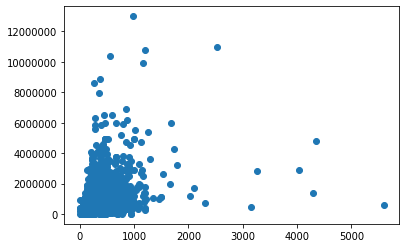

In [38]:
plt.scatter(dataset['Living_space'], dataset['Price'])
plt.ticklabel_format(style = 'plain') # avoid values with 1e7
pass

Можно вот так:

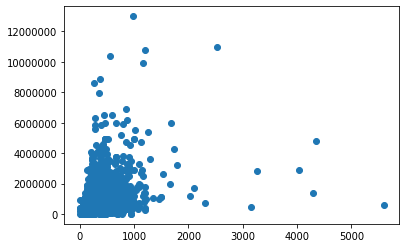

In [39]:
plt.scatter(x='Living_space', y='Price', data=dataset)
plt.ticklabel_format(style = 'plain') # avoid values with 1e7
pass

Видно, что основная масса точек сгрудилась в левом нижнем углу. Какие-то точки соответствуют домам с чрезмерно большими значениями цены или площади. Например, более  4 млн. евро и 2 т. кв.м.. Это выбросы (outliers) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Вероятнее всего это ошибки в данных, вызванные некорректным установлением цен за объект, в случае если продавец еще не изучил ситуацию на рынке, а сразу выставил объект за желаемую цену, или из-за попадания уникальных объектов, которые по своим характеристикам сильно отличаются от основной массы (такую недвижимость стоит рассматривать индивидуально). В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется исключить из выборки.

Для обнаружения выбросов найдем, например, квантили для признаков Price и Living_space:

In [40]:
dataset['Price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      19802.0
0.010      30000.0
0.050      79275.0
0.100     130000.0
0.500     405215.0
0.900    1050000.0
0.950    1495000.0
0.990    2900000.0
0.995    3836750.0
Name: Price, dtype: float64

Мы видим, например, что 99.9% всех значений признака 'Price' находится в диапазоне от 19.8 тыс. евро до 3.8 млн. евро. (это значения квантилей, соответствующих уровням 0.005 и 0.995 соотвтетственно)

In [41]:
dataset['Living_space'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     44.510000
0.010     55.000000
0.050     90.000000
0.100    105.000000
0.500    176.775002
0.900    356.951001
0.950    456.000000
0.990    800.000000
0.995    984.900000
Name: Living_space, dtype: float64

99.9% всех значений 'Living_space' находится в диапазоне от 44.510 до 984.900 кв. м.

Удалим все строки таблицы, в которых 'Price' или 'Living_space' выходят за пределы квантилей $0.005$, $0.995$.

In [42]:
rows_to_drop = dataset[
    (dataset['Price'] < dataset['Price'].quantile(0.005)) | (dataset['Price'] > dataset['Price'].quantile(0.995)) | 
    (dataset['Living_space']  < dataset['Living_space' ].quantile(0.005)) | (dataset['Living_space']  > dataset['Living_space' ].quantile(0.995))].index
data = dataset.drop(rows_to_drop)
data.shape

(10356, 25)

Таких значений оказалось ровно 196, так как изначально было 10552 строк данных, теперь же осталось 10356. Далее приведены индексы изьятых значений.

In [43]:
rows_to_drop

Int64Index([   74,    79,    83,    92,   258,   327,   343,   460,   724,
              997,
            ...
            10118, 10177, 10356, 10379, 10435, 10436, 10462, 10465, 10479,
            10530],
           dtype='int64', length=196)

## Визуализация и описательная статистика
Визуализация и описательная статистика - важные этапы анализа данных. Сводную информацию о признаках можем получить, вызвав метод describe:

In [44]:
data.describe()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
count,1.035600e+04,10356.000000,10356.000000,5460.000000,10356.000000,6778.000000,8623.000000,7743.000000,9696.000000,5262.000000,2413.000000,8462.000000
mean,5.312149e+05,209.194016,1435.294663,129.104342,7.208285,4.124373,2.271483,2.278703,1958.793729,2010.711136,117.621964,2.610376
std,4.568544e+05,119.425865,8383.119065,152.659684,3.987538,2.254376,1.470559,0.804161,55.703767,10.529950,53.991099,2.807299
min,1.999000e+04,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1300.000000,1900.000000,5.100000,1.000000
25%,2.550000e+05,130.000000,370.000000,48.000000,5.000000,3.000000,1.000000,2.000000,1935.000000,2006.000000,83.170000,1.000000
50%,4.085000e+05,176.000000,652.000000,80.000000,6.000000,4.000000,2.000000,2.000000,1971.000000,2015.000000,112.700000,2.000000
75%,6.500000e+05,250.000000,1031.000000,150.000000,8.000000,5.000000,3.000000,3.000000,1996.000000,2018.000000,146.000000,3.000000
max,3.800000e+06,980.000000,547087.000000,2200.000000,42.000000,30.000000,25.000000,13.000000,2022.000000,2206.000000,503.940000,70.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квантилей.
По умолчанию этот метод дает информацию только о количественных признаках.
Давайте снова построим диаграмму рассеивания для признаков 'Living_space', 'Price':

In [45]:
data.describe(include=['category'])

,Type,State
count,9978,10355
unique,11,16
top,Mid-terrace house,Nordrhein-Westfalen
freq,4295,1639


Давайте снова построим диаграмму рассеивания для признаков 'Living_space', 'Price':

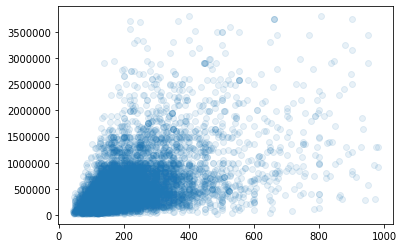

In [46]:
plt.scatter(data['Living_space'], data['Price'], alpha=0.1)
plt.ticklabel_format(style = 'plain') # avoid values with 1e7
pass

Точки выстроились более-менее внутри конуса, носик которого находится в точке (0,0), а тело лежит на медиане первого квадранта координатной плоскости.

Отрисовка всех точек требует много времени. Тем более, точки накладываются друг на друга и сложно понять сколько точек на том или ином участке графика (особенно, если не использовать параметр alpha). Поэтому изобразим только 1000 случайных точек, что будет в нашем случае составлять примерно половину от их общего числа:

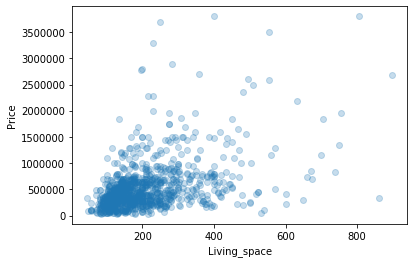

In [47]:
np.random.seed(random_seed_number)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['Living_space'], data.iloc[random_subset]['Price'], alpha=0.25)
plt.xlabel('Living_space')
plt.ylabel('Price')
plt.ticklabel_format(style = 'plain') # avoid values with 1e7
pass

Построим диаграмму рассеивания для признаков 'Price' и 'Rooms':

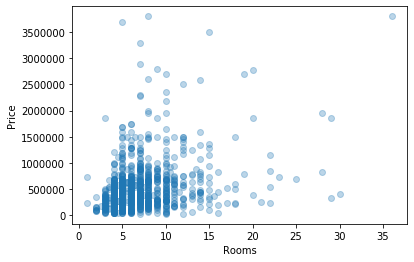

In [48]:
plt.scatter(data.iloc[random_subset]['Rooms'], data.iloc[random_subset]['Price'], alpha = 0.3)
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.ticklabel_format(style = 'plain') # avoid values with 1e7
pass

Из рисунка понятно, что, по-видимому, существует зависимость между ценой дома и количеством комнат, что точки сгущаются в диапазоне 3-7 комнат. В методологии оценки недвижимости в европейских странах количество комнат является одним из ключевых ценообразующих факторов и порой намного важнее площади, в отличие от отечественных методов оценки, где площать объекта наиболее важна. Построим все возможные диаграммы рассеивания для каждой пары переменных:

Для отрисовки диаграммы рассеивания можем воспользоваться более продвинутой функцией scatterplot из модуля seaborn. Например, в следующей диаграмме цвет маркеров соответствует типу дома 'Type', а размер - количеству комнат 'Rooms':

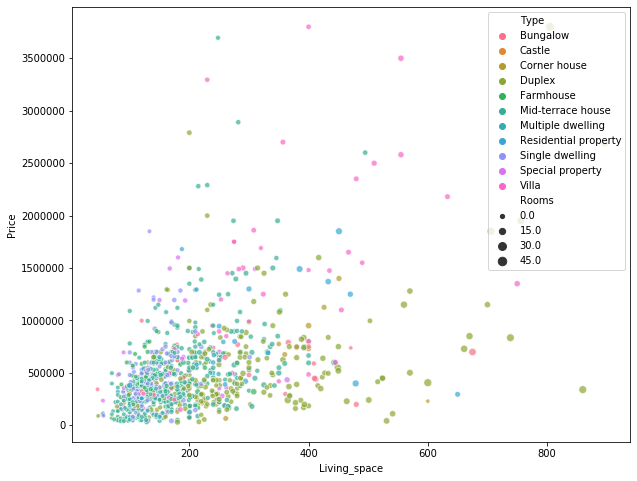

In [49]:
plt.figure(figsize = (10, 8))
plt.ticklabel_format(style = 'plain') # avoid values with 1e7
sns.scatterplot(x='Living_space', y='Price', size='Rooms', hue='Type', data=data.iloc[random_subset], alpha=0.7)
pass

Мы видим, что наблюдается ожидаемая корреляция между количеством комнат и площадью дома. Также можно увидеть, что дома на две семьи (Duplex), как правило, имеют умеренные размеры и умеренные цены (но иногда встречаются варианты с большим количеством комнат и как следствие большие по площади, но при этом цена за такие дома умеренная ведь минус такого жилья, что оно не целиком принадлежит одной семье). Виллы, как правило, больше и дороже. Бунгало, одноэтажные дома для одной семьи бывают в разной ценовой категории.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


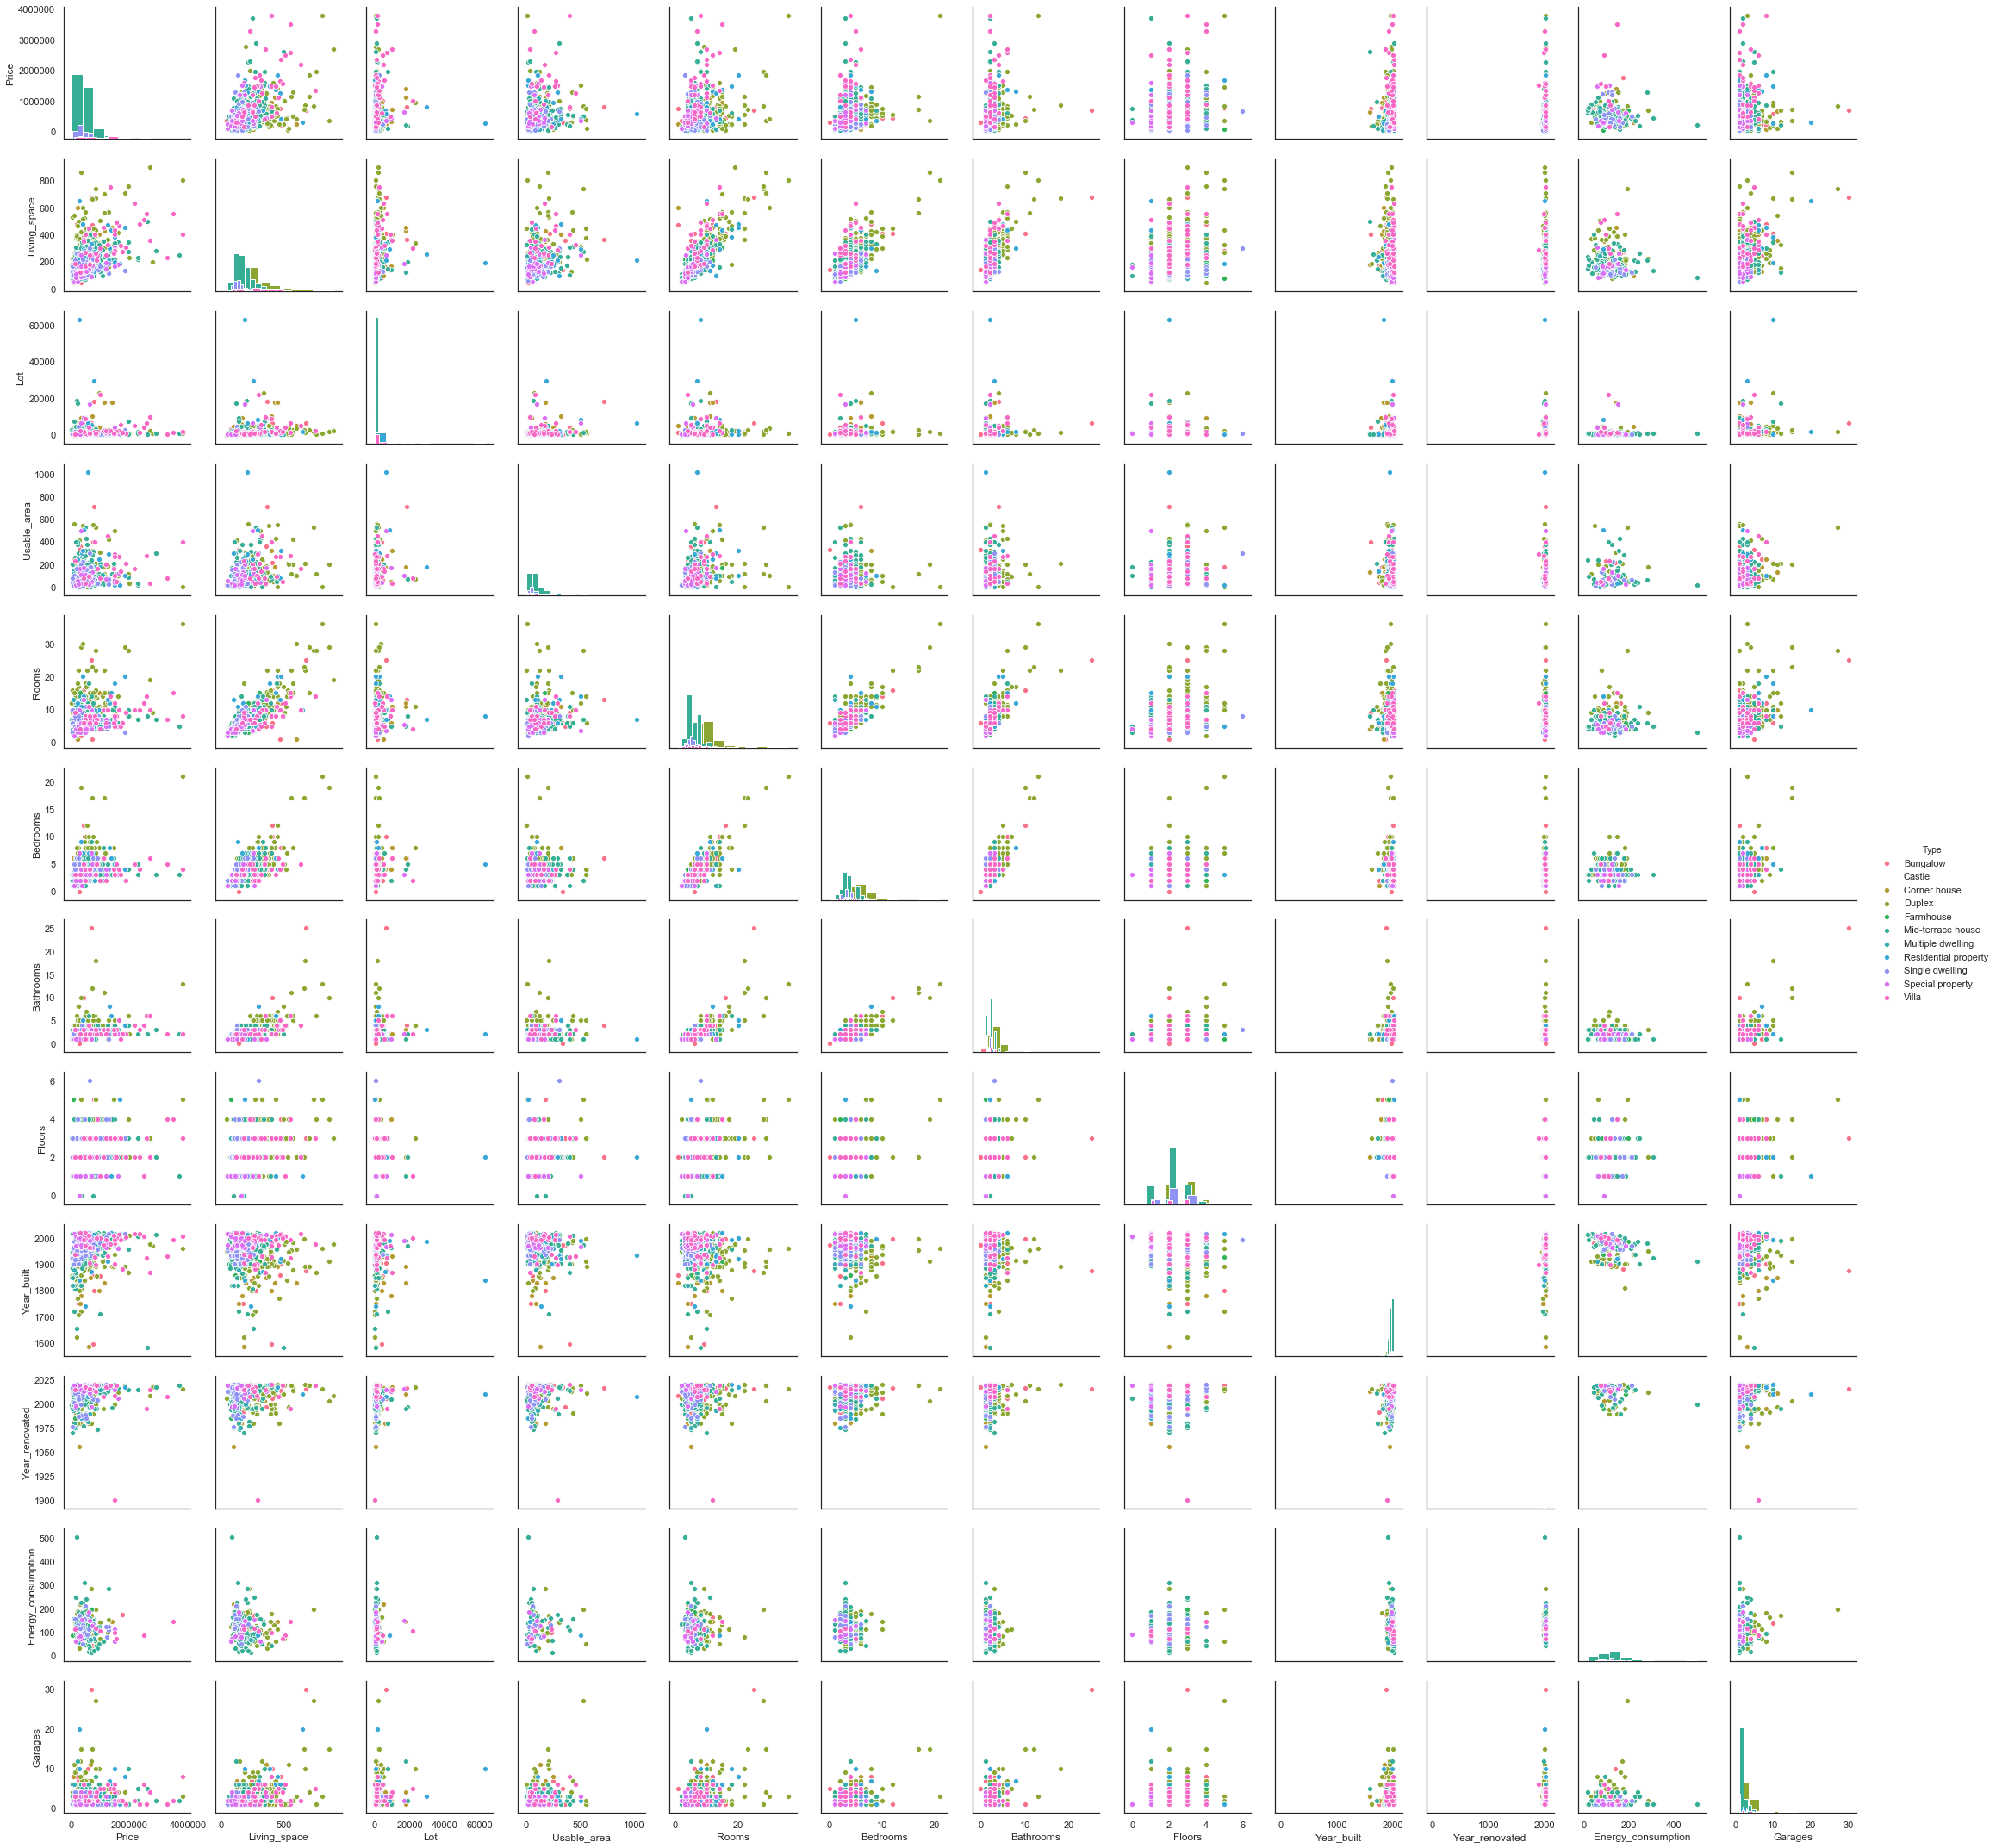

In [50]:
sns.set(style = 'white', rc={'figure.figsize':(20, 6)})
sns.pairplot(data.iloc[random_subset], hue='Type', diag_kind='hist')
#plt.legend() # No handles with labels found to put in legend.
pass

На диаграммах, в частности, наблюдается попарная корреляция между Price, Type и Rooms.

На диагонали расположены гистограммы распределения признаков. Гистограммы можно построить отдельно.

Построить гистограмму можно с помощю функции plt.hist, но мы воспользуемся distplot из библиотеки seaborn.

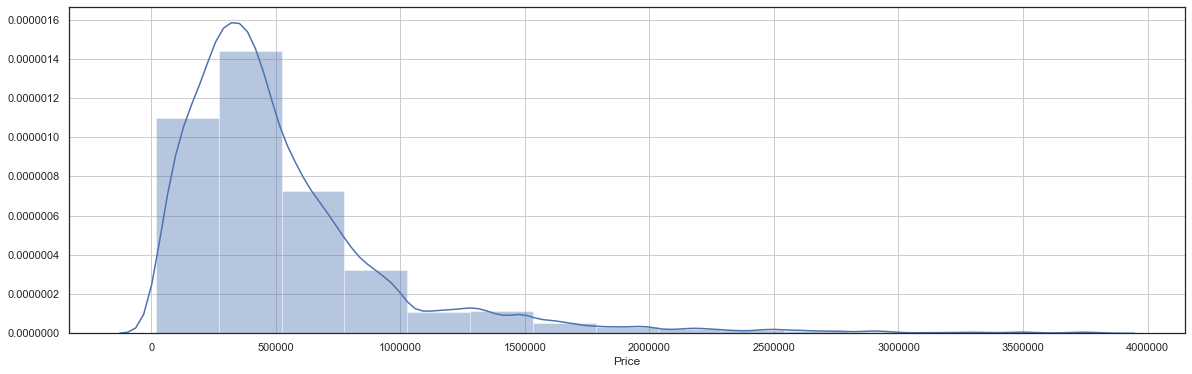

In [51]:
sns.distplot(data['Price'], bins=15) # устаревший метод (у меня Jupyter Notebook установлен давно, и подходит этот метод)
#sns.displot(data['Price'], bins=15) # новый метод
plt.ticklabel_format(style = 'plain') # avoid values with 1e7
plt.grid()
pass

Можно представить вместе и диаграмму рассеивания для пары признаков и соответствующие гистограммы:

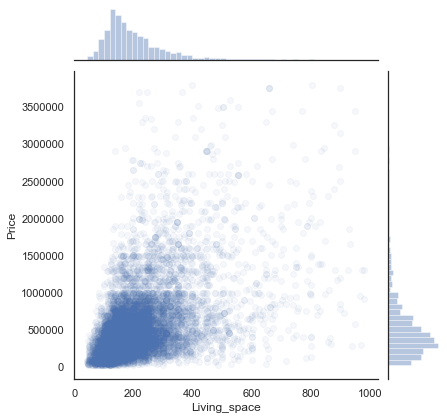

In [52]:
sns.jointplot(x='Living_space', y='Price', alpha=.05, data=data)
plt.ticklabel_format(style = 'plain') # avoid values with 1e7
pass

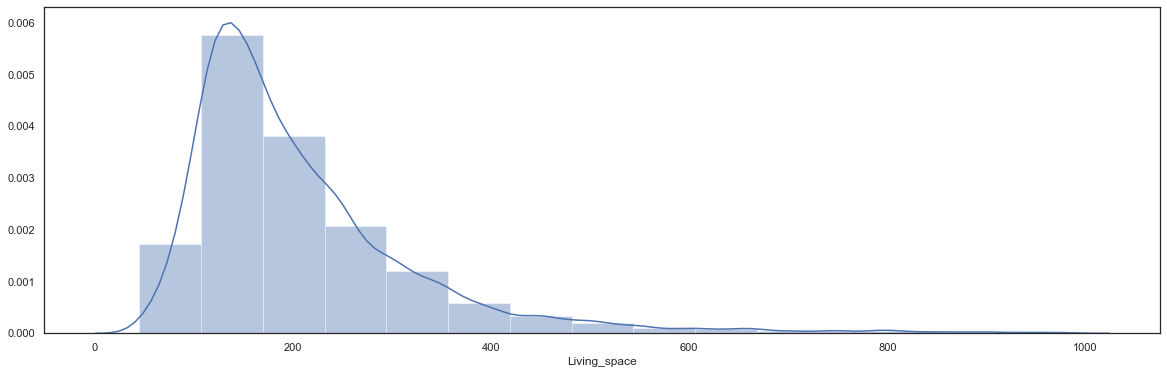

In [53]:
sns.distplot(data['Living_space'], bins = 15) # Устаревший метод
#sns.displot(data['Living_space'], bins = 15) # Новый метод
pass

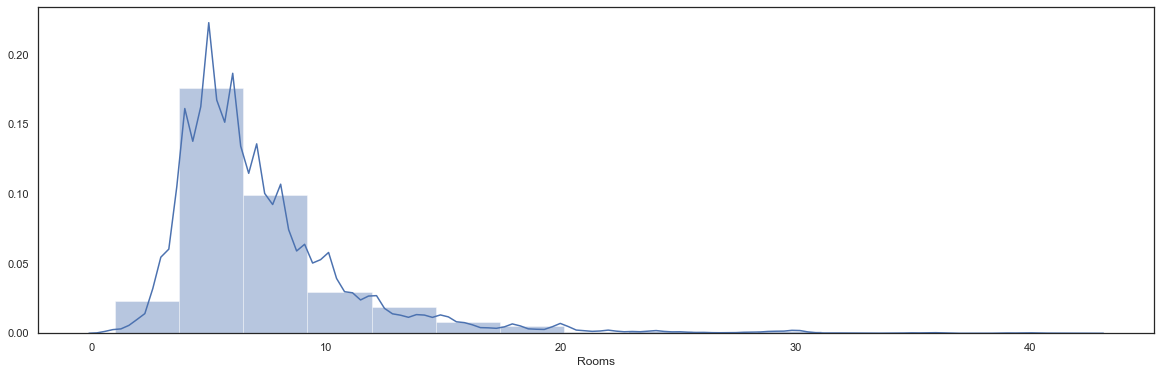

In [54]:
sns.distplot(data['Rooms'], bins = 15) # Устаревший метод
#sns.displot(data['Rooms'], bins = 15) # Новый метод
pass

Ящик с усами (бокс-диаграмма) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.
На практике построение ящиков с усами для оценки недвижимости используется очень часто, потому что позволяет наглядно продемонстрировать средную цену объектов, а также доверительный и расширенные интервалы для цены.

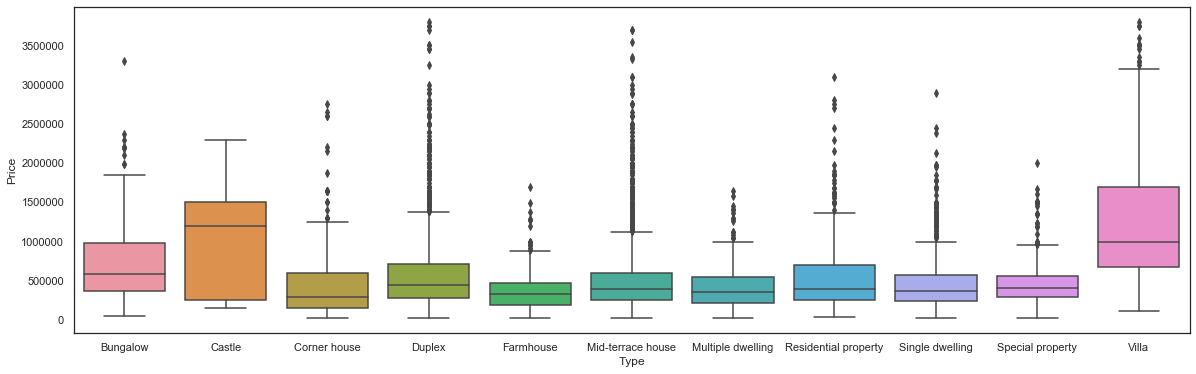

In [55]:
sns.boxplot(x="Type", y="Price", data=data)
pass

Также информацию о характере распределения можно получить из скрипичных графиков (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

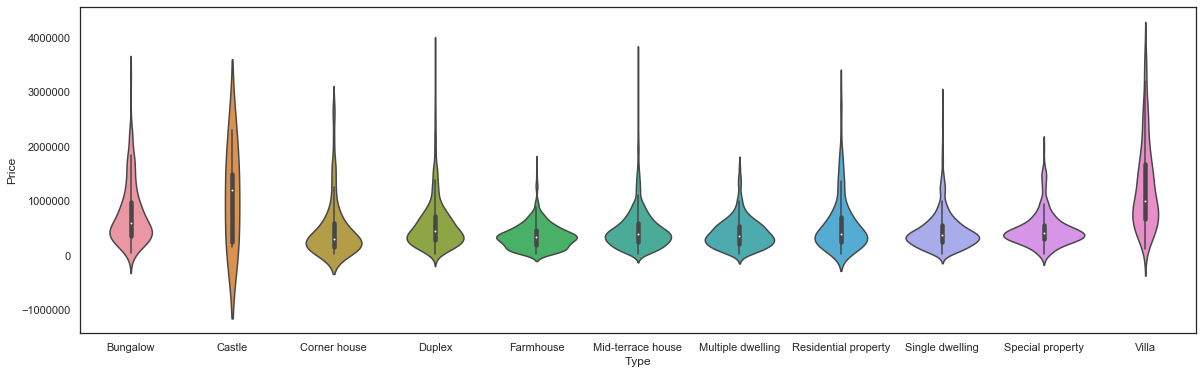

In [56]:
sns.violinplot(x="Type", y="Price", data=data)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [57]:
corr_mat = data.corr()
corr_mat

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
Price,1.000000,0.490352,0.115862,0.183204,0.315315,0.236667,0.311530,0.235632,0.143108,0.138212,-0.161304,0.167731
Living_space,0.490352,1.000000,0.091255,0.397862,0.797108,0.644646,0.701306,0.301418,-0.133507,0.033096,-0.067192,0.395374
Lot,0.115862,0.091255,1.000000,0.213403,0.057371,0.028732,0.039890,-0.021946,-0.046469,0.001034,-0.008789,0.102147
Usable_area,0.183204,0.397862,0.213403,1.000000,0.356085,0.231418,0.253781,0.093257,-0.121174,-0.025708,0.021587,0.247376
Rooms,0.315315,0.797108,0.057371,0.356085,1.000000,0.784149,0.739839,0.310371,-0.197291,-0.009393,0.021955,0.359240
Bedrooms,0.236667,0.644646,0.028732,0.231418,0.784149,1.000000,0.652713,0.253660,-0.110131,0.014413,-0.010934,0.264161
Bathrooms,0.311530,0.701306,0.039890,0.253781,0.739839,0.652713,1.000000,0.266739,-0.092299,0.058407,0.034668,0.318675
Floors,0.235632,0.301418,-0.021946,0.093257,0.310371,0.253660,0.266739,1.000000,-0.093698,0.029070,-0.027510,0.073325
Year_built,0.143108,-0.133507,-0.046469,-0.121174,-0.197291,-0.110131,-0.092299,-0.093698,1.000000,0.213930,-0.287511,-0.088019
Year_renovated,0.138212,0.033096,0.001034,-0.025708,-0.009393,0.014413,0.058407,0.029070,0.213930,1.000000,-0.154552,-0.001194


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

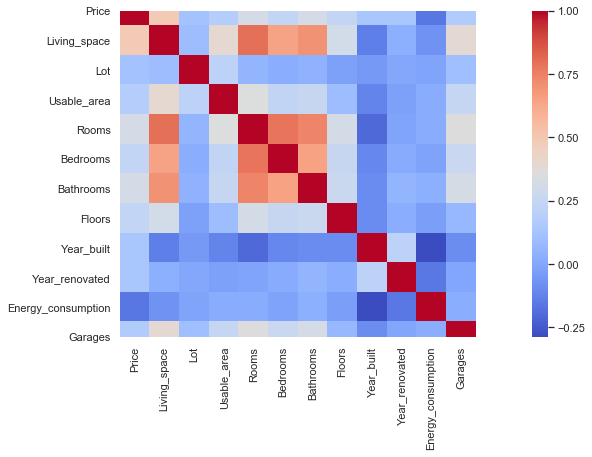

In [58]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения (> 0.3 так как если коэффициент корреляции меньше данного числа, то связь между показателями слабая и не берется для рассмотрения):

In [59]:
corr_mat > 0.3

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
Price,True,True,False,False,True,False,True,False,False,False,False,False
Living_space,True,True,False,True,True,True,True,True,False,False,False,True
Lot,False,False,True,False,False,False,False,False,False,False,False,False
Usable_area,False,True,False,True,True,False,False,False,False,False,False,False
Rooms,True,True,False,True,True,True,True,True,False,False,False,True
Bedrooms,False,True,False,False,True,True,True,False,False,False,False,False
Bathrooms,True,True,False,False,True,True,True,False,False,False,False,True
Floors,False,True,False,False,True,False,False,True,False,False,False,False
Year_built,False,False,False,False,False,False,False,False,True,False,False,False
Year_renovated,False,False,False,False,False,False,False,False,False,True,False,False


Так как коэффициентов корреляции больше 0,3 достаточно много, рассмотрим более сильные связи между показателями, а для этого ограничим коэффициент корреляции не меньше 0,49

In [60]:
corr_mat.where(np.triu(corr_mat > 0.49, k=1)).stack().sort_values(ascending=False)

Living_space  Rooms           0.797108
Rooms         Bedrooms        0.784149
              Bathrooms       0.739839
Living_space  Bathrooms       0.701306
Bedrooms      Bathrooms       0.652713
Living_space  Bedrooms        0.644646
Price         Living_space    0.490352
dtype: float64

Достаточно большие значения этих коэффициентов вполне объяснимы.
Обратите внимание на большую корреляцию между жилой площадью и количеством комнат, ценой дома и ее жилой  площадью:

In [61]:
corr_mat.loc['Living_space', 'Rooms']

0.7971080898268686

In [62]:
corr_mat.loc['Price', 'Living_space']

0.49035187184573975

Также обратите внимание, что коэффициент корреляции между 'Price', 'Garages' очень близок к нулю.

In [63]:
corr_mat.loc['Price', 'Garages']

0.16773121393078172

Например, выберем все данные, соответствующие домам типа Бунгало (Bungalow одноэтажный дом для одной семьи) ценой больше 1,5 млн. евро и выше:

In [64]:
data.loc[(data['Type']=='Bungalow') & (data['Price'] >= 1500000), :]

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
100,1600000.0,Bungalow,450.000000,633.0,110.0,ab sofort,9.0,NaN,3.0,3.0,...,Erdwärme,not required by law,NaN,NaN,NaN,Baden-Württemberg,Ortenaukreis,Mahlberg,2.0,Garage
175,1690000.0,Bungalow,670.000000,1000.0,NaN,01.01.2022,20.0,20.0,NaN,3.0,...,Gas,not required by law,NaN,NaN,NaN,Baden-Württemberg,Heilbronn (Kreis),Ilsfeld,20.0,Outside parking lot
461,1695000.0,Bungalow,210.000000,7575.0,1066.0,nach Vereinbarung,8.0,5.0,2.0,3.0,...,Nahwärme,available,demand certificate,NaN,NaN,Baden-Württemberg,Ludwigsburg (Kreis),Vaihingen an der Enz,30.0,Outside parking lot
512,2290000.0,Bungalow,160.000000,1500.0,200.0,nach Vereinbarung,6.0,4.0,2.0,3.0,...,Gas,available,consumption certificate,NaN,NaN,Baden-Württemberg,Heilbronn,Heilbronner Kernstadt,3.0,Parking lot
850,1650000.0,Bungalow,479.000000,1728.0,NaN,nach Absprache,10.0,7.0,3.0,2.0,...,Öl,available,consumption certificate,100.6,D,Baden-Württemberg,Esslingen (Kreis),Kirchheim unter Teck,4.0,Parking lot
1197,1750000.0,Bungalow,390.000000,1208.0,510.0,nach Vereinbarung,10.0,6.0,5.0,3.0,...,NaN,available for inspection,NaN,NaN,NaN,Baden-Württemberg,Lörrach (Kreis),Schopfheim,NaN,NaN
1232,1540000.0,Bungalow,285.000000,1578.0,NaN,Vereinbarung,12.0,7.0,5.0,3.0,...,Gas,available,consumption certificate,262.6,H,Baden-Württemberg,Lörrach (Kreis),Lörrach,2.0,Garage
1666,1501000.0,Bungalow,500.000000,600.0,200.0,nach Kauf,10.0,6.0,4.0,3.0,...,Öl,available for inspection,NaN,NaN,NaN,Bayern,Schwandorf (Kreis),Nittenau,7.0,Garage
2610,1600000.0,Bungalow,636.000000,1500.0,250.0,01.09.2017,9.0,NaN,5.0,3.0,...,NaN,not required by law,NaN,NaN,NaN,Bayern,Augsburg (Kreis),Bobingen,NaN,NaN
2804,1800000.0,Bungalow,387.000000,300.0,NaN,nach Absprache,9.0,6.0,3.0,NaN,...,NaN,available,demand certificate,NaN,B,Berlin,Wannsee (Zehlendorf),NaN,1.0,Carport


Значения, которые принимают категориальные признаки, можно получить следующим образом:

In [65]:
data['Type'].unique()

[Multiple dwelling, Mid-terrace house, Farmhouse, Duplex, Single dwelling, ..., Bungalow, Villa, NaN, Corner house, Castle]
Length: 12
Categories (11, object): [Multiple dwelling, Mid-terrace house, Farmhouse, Duplex, ..., Bungalow, Villa, Corner house, Castle]

In [66]:
data['State'].unique()

[Baden-Württemberg, Rheinland-Pfalz, Bayern, Hessen, Berlin, ..., Schleswig-Holstein, Saarland, Sachsen, Sachsen-Anhalt, Thüringen]
Length: 17
Categories (16, object): [Baden-Württemberg, Rheinland-Pfalz, Bayern, Hessen, ..., Saarland, Sachsen, Sachsen-Anhalt, Thüringen]

Обратите внимание, что в столбце `Type` имеются **пропущенные значения** (закодированные значением `np.nan`).

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [67]:
data['Type'].value_counts() 

Mid-terrace house       4295
Duplex                  2081
Single dwelling         1163
Farmhouse                569
Multiple dwelling        379
Villa                    368
Residential property     347
Special property         343
Bungalow                 231
Corner house             197
Castle                     5
Name: Type, dtype: int64

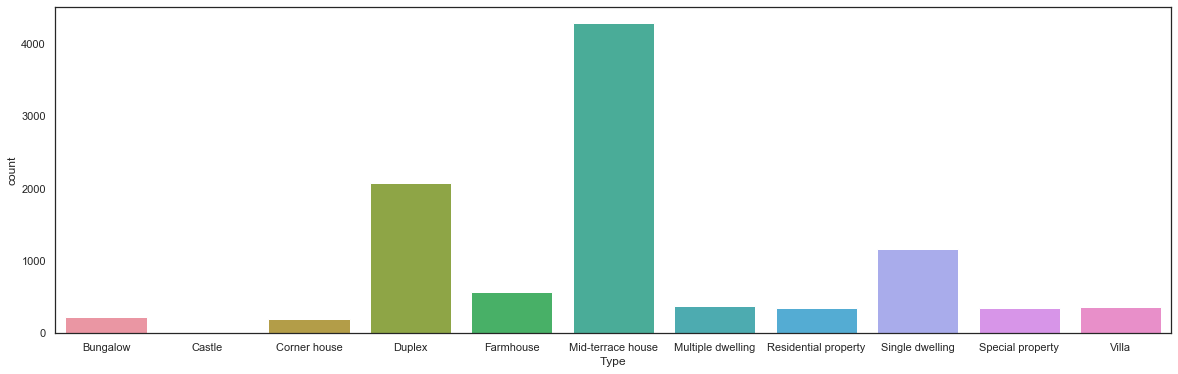

In [68]:
sns.countplot(x='Type', data=data)
pass

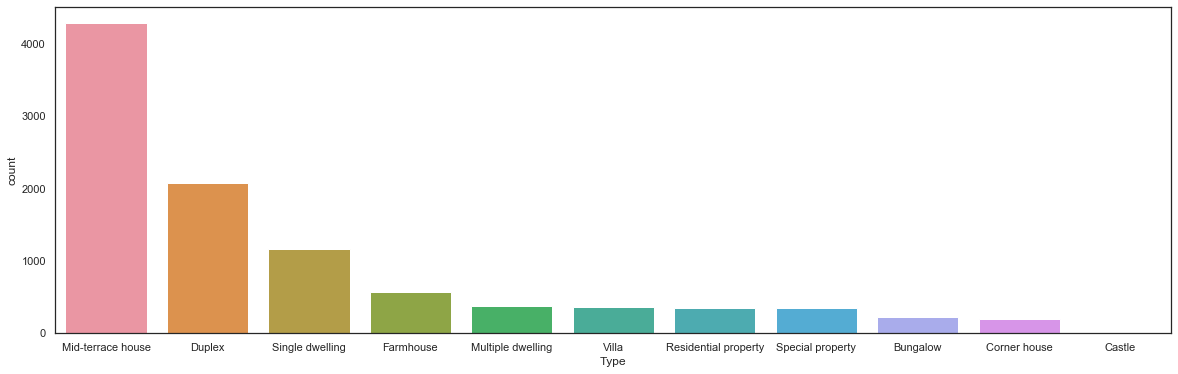

In [69]:
sns.countplot(x='Type', order=data['Type'].value_counts().index, data=data)
pass

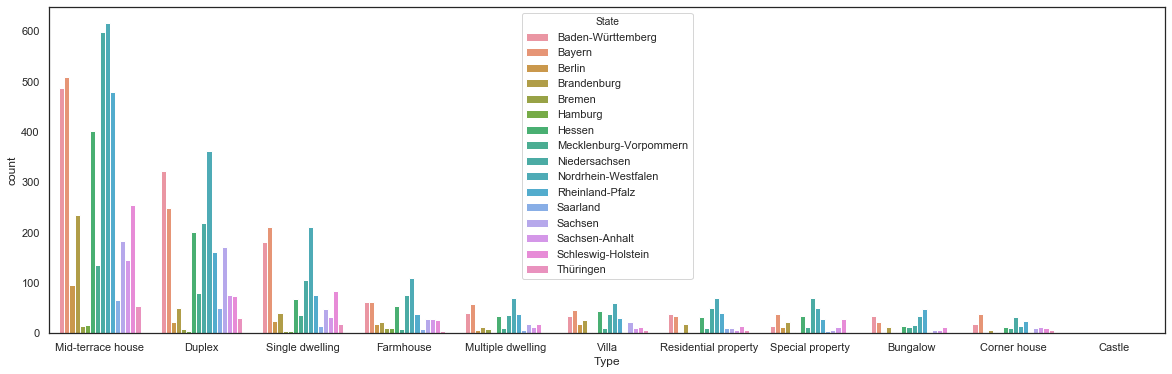

In [70]:
sns.countplot(x='Type', order=data['Type'].value_counts().index, hue='State', data=data)
pass

## 3. Заполнение пропущенных значений 

Пропущенные значения в таблице представлены значениями `np.nan`. 
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [71]:
data.isna().sum()

Price                         0
Type                        378
Living_space                  0
Lot                           0
Usable_area                4896
Free_of_Relation           3490
Rooms                         0
Bedrooms                   3578
Bathrooms                  1733
Floors                     2613
Year_built                  660
Furnishing_quality         2694
Year_renovated             5094
Condition                   312
Heating                     578
Energy_source              1166
Energy_certificate          694
Energy_certificate_type    3406
Energy_consumption         7943
Energy_efficiency_class    4678
State                         1
City                          1
Place                       283
Garages                    1894
Garagetype                 1894
dtype: int64

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями.
В нашем случае это разумно, так как таких строк немного.
В некоторых случаях можно удалить столбцы с пропущенными значениями.
Однако если данных мало такие простые стратегии могут привести к тому, что данных станет вообще ничтожное количество.
Простая разумная стратегия - заполнить пропущенные значения средним или медианой (для количественных признаков)
или модой (для номинальных признаков).

Удалим не важные для нас столбцы с пропущенными значениями:

In [72]:
data = data.drop(columns=['Free_of_Relation', 'Furnishing_quality','Condition','Heating',
                          'Energy_source','Energy_certificate','Energy_certificate_type',
                          'Energy_efficiency_class','City','Place','Garagetype'])

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [73]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

In [74]:
data.isna().sum()

Price                   0
Type                  378
Living_space            0
Lot                     0
Usable_area             0
Rooms                   0
Bedrooms                0
Bathrooms               0
Floors                  0
Year_built              0
Year_renovated          0
Energy_consumption      0
State                   1
Garages                 0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [75]:
data['Type' ].fillna(data['Type' ].mode().iloc[0], inplace=True)
data['State'].fillna(data['State'].mode().iloc[0], inplace=True)

In [76]:
data.isna().sum()

Price                 0
Type                  0
Living_space          0
Lot                   0
Usable_area           0
Rooms                 0
Bedrooms              0
Bathrooms             0
Floors                0
Year_built            0
Year_renovated        0
Energy_consumption    0
State                 0
Garages               0
dtype: int64

In [77]:
data.describe()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
count,1.035600e+04,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000
mean,5.312149e+05,209.194016,1435.294663,105.889312,7.208285,4.081402,2.226053,2.208382,1959.571649,2012.820780,113.846842,2.498745
std,4.568544e+05,119.425865,8383.119065,113.521422,3.987538,1.824729,1.345695,0.705795,53.981754,7.805886,26.140632,2.548588
min,1.999000e+04,45.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1300.000000,1900.000000,5.100000,1.000000
25%,2.550000e+05,130.000000,370.000000,79.000000,5.000000,3.000000,2.000000,2.000000,1938.000000,2014.000000,112.700000,1.000000
50%,4.085000e+05,176.000000,652.000000,80.000000,6.000000,4.000000,2.000000,2.000000,1971.000000,2015.000000,112.700000,2.000000
75%,6.500000e+05,250.000000,1031.000000,88.000000,8.000000,4.000000,3.000000,3.000000,1994.000000,2015.000000,112.700000,3.000000
max,3.800000e+06,980.000000,547087.000000,2200.000000,42.000000,30.000000,25.000000,13.000000,2022.000000,2206.000000,503.940000,70.000000


In [78]:
dataset.describe(include=['category'])

,Type,State
count,10150,10551
unique,11,16
top,Mid-terrace house,Nordrhein-Westfalen
freq,4324,1660


## 4.Обработка категориальных признаков.

К категориальному (небинарному) признаку 'Type' применим метод бинаризации (one-hot encoding), который заключается в следующем.

Этот признак принимает 11 значений: 
1. Multiple dwelling - Многоквартирное жилье
2. Mid-terrace house - Дом со средней террасой
3. Farmhouse - Фермерский дом
4. Duplex - Дом на две семьи, разделенный пополам
5. Single dwelling - Односемейный дом
6. Residential property - Жилая недвижимость
7. Special property – Специфический дом
8. Bungalow – Бунгало, одноэтажный дом для одной семьи, часто с плоской крышей и обширной верандой
9. Villa – Вилла, загородный дом предназначенный для сезонного проживания, дорогостоящий, богато украшенный, на большой территории, для проживания одной семьи
10. Corner house – угловой дом
11. Castle - Замок

Вместо признака 'Type' будем использовать 11 новых признаков (dummy-признаков, dummy - фиктивный)
если признак 'Type' принимает значение 'Multiple dwelling', то признак 'Multiple dwelling' равен 1, а все остальные 0;
если признак 'Type' принимает значение 'Mid-terrace house', то признак 'Mid-terrace house' равен 1, а все остальные 0
и т.д.
Такую бинаризацию можно выполнить с помощью функции get_dummies:

In [79]:
#data = data.assign(TypeNum=data['Type'].cat.codes)

In [80]:
#Type_dummies = pd.get_dummies(data['Type'])

In [81]:
#Type_dummies.head()

In [82]:
data = data.assign(TypeCode=data['Type'].cat.codes)

Добавим эти dummy-столбцы к таблице и удалим столбец Type:

In [83]:
#data = pd.concat((data, Type_dummies), axis=1)
data = data.drop(['Type'], axis=1)

In [84]:
data.head()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,State,Garages,TypeCode
0,498000.0,106.000000,229.0,80.00,5.5,3.0,1.0,2.0,2005.0,2015.0,112.7,Baden-Württemberg,2.0,6
1,495000.0,140.929993,517.0,20.00,6.0,3.0,2.0,2.0,1994.0,2015.0,112.7,Baden-Württemberg,7.0,5
2,749000.0,162.889999,82.0,37.62,5.0,3.0,2.0,4.0,2013.0,2015.0,112.7,Baden-Württemberg,1.0,4
3,259000.0,140.000000,814.0,80.00,4.0,4.0,2.0,2.0,1900.0,2000.0,112.7,Baden-Württemberg,1.0,4
4,469000.0,115.000000,244.0,80.00,4.5,2.0,1.0,2.0,1968.0,2019.0,112.7,Baden-Württemberg,1.0,6


Аналогично, закодируем 'State'
Этот признак принимает 16 значений Земля-государство(штат):
1. Baden-Württemberg
2. Rheinland-Pfalz
3. Bayern
4. Hessen
5. Berlin
6. Brandenburg
7. Bremen
8. Niedersachsen
9. Hamburg
10. Nordrhein-Westfalen
11. Mecklenburg-Vorpommern
12. Schleswig-Holstein
13. Saarland
14. Sachsen
15. Sachsen-Anhalt
16. Thüringen

Вместо признака 'State' будем использовать его код

In [85]:
data = data.assign(StateCode=data['State'].cat.codes)

In [86]:
data = data.drop(['State'], axis=1)

In [87]:
data.head()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages,TypeCode,StateCode
0,498000.0,106.000000,229.0,80.00,5.5,3.0,1.0,2.0,2005.0,2015.0,112.7,2.0,6,0
1,495000.0,140.929993,517.0,20.00,6.0,3.0,2.0,2.0,1994.0,2015.0,112.7,7.0,5,0
2,749000.0,162.889999,82.0,37.62,5.0,3.0,2.0,4.0,2013.0,2015.0,112.7,1.0,4,0
3,259000.0,140.000000,814.0,80.00,4.0,4.0,2.0,2.0,1900.0,2000.0,112.7,1.0,4,0
4,469000.0,115.000000,244.0,80.00,4.5,2.0,1.0,2.0,1968.0,2019.0,112.7,1.0,6,0


## 5. Проведение нормализации.

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:

приведение к отрезку  [0,1]  - это линейное преобразование, приводящее все значения к заданному отрезку;
стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.
Выполним стандартизацию всех признаков:

In [88]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [89]:
data_stand.describe()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages,TypeCode,StateCode
count,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04,1.035600e+04
mean,-3.097014e-16,-4.409802e-16,1.105774e-16,-3.652769e-16,-4.743748e-16,-1.849198e-15,-5.000292e-16,6.745688e-15,9.654738e-16,3.058902e-16,6.528160e-13,8.747697e-16,-8.867579e-16,-3.568992e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.119010e+00,-1.374861e+00,-1.712125e-01,-9.327694e-01,-1.556922e+00,-2.236717e+00,-1.654203e+00,-3.128926e+00,-1.221842e+01,-1.445330e+01,-4.160069e+00,-5.880768e-01,-2.505846e+00,-1.506609e+00
25%,-6.046015e-01,-6.631240e-01,-1.270762e-01,-2.368655e-01,-5.537967e-01,-5.926371e-01,-1.679820e-01,-2.952437e-01,-3.996100e-01,1.510680e-01,-4.387202e-02,-5.880768e-01,-5.494186e-01,-1.282132e+00
50%,-2.686083e-01,-2.779484e-01,-9.343714e-02,-2.280566e-01,-3.030153e-01,-4.461051e-02,-1.679820e-01,-2.952437e-01,2.117077e-01,2.791765e-01,-4.387202e-02,-1.956972e-01,-6.031183e-02,2.892005e-01
75%,2.600065e-01,3.416818e-01,-4.822724e-02,-1.575853e-01,1.985473e-01,-4.461051e-02,5.751286e-01,1.121598e+00,6.377776e-01,2.791765e-01,-4.387202e-02,1.966823e-01,4.287949e-01,7.381528e-01
max,7.154982e+00,6.454251e+00,6.508934e+01,1.844683e+01,8.725113e+00,1.420408e+01,1.692356e+01,1.529001e+01,1.156471e+00,2.474789e+01,1.492287e+01,2.648611e+01,2.385222e+00,1.860533e+00


### Отбор признаков 

Для предсказания цены дома будем использовать все входные признаки, кроме `Lot`.

In [90]:
data_stand.columns

Index(['Price', 'Living_space', 'Lot', 'Usable_area', 'Rooms', 'Bedrooms',
       'Bathrooms', 'Floors', 'Year_built', 'Year_renovated',
       'Energy_consumption', 'Garages', 'TypeCode', 'StateCode'],
      dtype='object')

In [91]:
X = data_stand.drop(['TypeCode', 'Lot'], axis=1)
y = data['TypeCode']

# 6. Разбиение данных на обучающую и тестовую выборки

### Обучаем модель
Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_seed_number)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(7767, 2589)

## 7. Запустить классификатор.

Задача классификации
Создаем модель и задаем гиперпараметры (конструктор)
Тренируем модель (метод fit)
Используем модель на новых данных (метод predict) и измеряем качество модели

In [1]:
#conda install tensorflow  

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - tensorflow


The following NEW packages will be INSTALLED:

  _tflow_select      pkgs/main/win-64::_tflow_select-2.3.0-mkl
  absl-py            pkgs/main/win-64::absl-py-0.13.0-py37haa95532_0
  aiohttp            pkgs/main/win-64::aiohttp-3.7.4.post0-py37h2bbff1b_2
  astor              pkgs/main/win-64::astor-0.8.1-py37haa95532_0
  async-timeout      pkgs/main/win-64::async-timeout-3.0.1-py37haa95532_0
  blinker            pkgs/main/win-64::blinker-1.4-py37haa95532_0
  cachetools         pkgs/main/noarch::cachetools-4.2.2-pyhd3eb1b0_0
  gast               pkgs/main/win-64::gast-0.2.2-py37_0
  google-auth        pkgs/main/noarch::

In [93]:
# загружаем keras

#conda install tensorflow  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

from sklearn import ensemble
from sklearn.metrics import accuracy_score

In [94]:
RF_model = ensemble.RandomForestClassifier()

In [95]:
y_train.describe()

count    7767.000000
mean        5.127720
std         2.041524
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        10.000000
Name: TypeCode, dtype: float64

In [96]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
RF_predictions = RF_model.predict(X_test)

In [98]:
score = accuracy_score(y_test ,RF_predictions)
print(score)

0.5156431054461182


Мы видим, что точность модели равно 54%, что можно расценивать как очень даже неплохой результат.

Метод Random Forest позволяет получить некоторые оценки "важности" признаков. Чем значение больше, тем признак важнее.

In [99]:
importances = RF_model.feature_importances_
importances

array([0.14261775, 0.14287475, 0.087769  , 0.12165194, 0.04897741,
       0.04348621, 0.03704129, 0.13186014, 0.069742  , 0.0478509 ,
       0.04904314, 0.07708548])

In [100]:
np.sum(importances)

1.0

In [101]:
importances = pd.Series(RF_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

Living_space          0.142875
Price                 0.142618
Year_built            0.131860
Rooms                 0.121652
Usable_area           0.087769
StateCode             0.077085
Year_renovated        0.069742
Garages               0.049043
Bedrooms              0.048977
Energy_consumption    0.047851
Bathrooms             0.043486
Floors                0.037041
dtype: float64

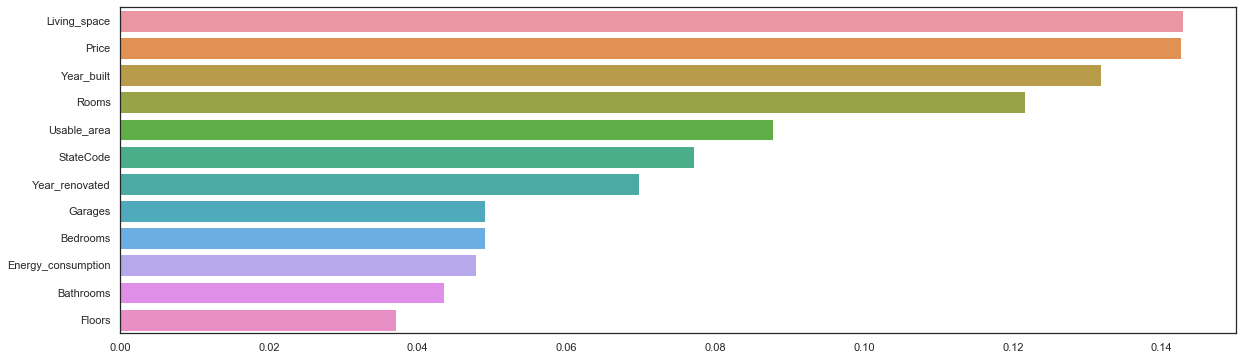

In [102]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## kNN

Запустим метод kNN на разных значениях k и построим график зависимости точности на обучающей и контрольной выборке от числа ближайших соседей.

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import parallel_backend
from sklearn.metrics import f1_score
from tqdm import tqdm

target_names = ['Flop', 'Hit']

y_train_pred = []
y_test_pred = []

iter_ = range(1, 51, 2)

for n_neig in tqdm(iter_):
    neigh = KNeighborsClassifier(n_neighbors=n_neig)
    neigh.fit(X_train, y_train)
    
    y_train_pred.append(neigh.predict(X_train))
    y_test_pred.append(neigh.predict(X_test))

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:27<00:00,  3.51s/it]


Из собранных предсказанний на тестовой выборки найдем оптимальное количество ближайших соседей. Важно выбрать минимум именно на тестовой выборке, так как модель переобучится на тестовых данных и нельзя выбирать оптимальное количество на тренировочной выборке.

Оптимальным является 1, при других запусках 5 ближайших соседей.

'best number of neighbors: 39'

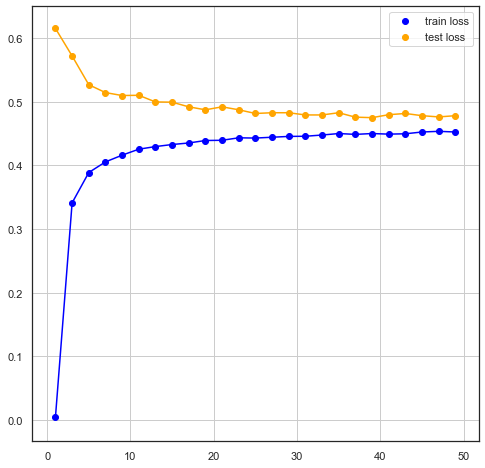

In [104]:
plt.rcParams['figure.figsize'] = (8, 8)

res_train = []
res_test = []

for i in range(len(iter_)):
    res_train.append(np.mean(y_train != y_train_pred[i]))
    res_test.append(np.mean(y_test != y_test_pred[i]))

plt.scatter(list(iter_)[::-1], res_train[::-1], color='blue', label='train loss')
plt.scatter(list(iter_)[::-1], res_test[::-1], color='orange', label='test loss')

plt.plot(list(iter_)[::-1], res_train[::-1], color='blue')
plt.plot(list(iter_)[::-1], res_test[::-1], color='orange')

plt.grid()
plt.legend()
f"best number of neighbors: {np.argmin(res_test)*2 + 1}"

Ошибки на обучающей и тестовой выборках:

In [109]:
knn = KNeighborsClassifier(n_neighbors = (np.argmin(res_test)*2 + 1)).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.07612626847852803 0.08086660346220022
